# Exemplo TRUMP


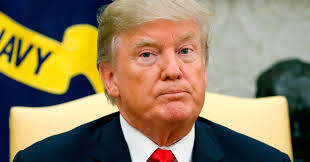


# Importar Dados


Dados de notícias internacionais de 01/Janeiro/2018 até 31/Janeiro/2018

In [ ]:
import json

data_ = json.load(open('../data/trump.json'))
print len(data_), u'notícias'
data = [d['body'][0] for d in data_]

In [ ]:
print data[2]

# Extrair Conteúdo

In [ ]:
import spacy


# IMPORTANTE: Baixar as bibliotecas anteriormente
# !python -m spacy download en


nlp = spacy.load('en')

In [ ]:
entities = []


for raw_text in data:
    doc = nlp(raw_text)
    entities.append(doc.ents)
    

In [ ]:
len(entities)

In [ ]:
print entities[0]
print '---'
print entities[1]
print '---'

print entities[2]

In [ ]:
print len(entities[0])

In [ ]:
filtered_entities = []
for doc_entities in entities:
    temp = []
    for ent_ in doc_entities:
        if ent_.label_ in ['PERSON', 'ORG']:
            temp.append(ent_)
    filtered_entities.append(temp)

print filtered_entities[0]
    

# Construir Grafo

In [ ]:
import networkx as nx
from itertools import combinations

In [ ]:
graph = nx.Graph()

for ent_ in entities:
        for (ent_1, ent_2) in combinations(ent_, 2):
            data_ = graph.get_edge_data(ent_1, ent_2)
            if data_:
                data['weight'] += 1
            else:
                graph.add_edge(ent_1, ent_2, weight=1)


